In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from pathlib import Path
import pandas as pd

In [2]:
def get_experiment_repeat_directories(exp_dir, repeat_prefix):
    exp_path = Path(experiment_dir)
    sub_dirs = list(exp_path.glob("**"))
    repeat_dirs = []
    print(sub_dirs)
    for d in sub_dirs:
        if repeat_prefix in d.stem:
            repeat_dirs.append(d.absolute())

    return repeat_dirs

def load_pickle(pickle_path):
    with open(pickle_path, 'rb') as f:
        data = pickle.load(f)
        return data
    

def load_all_particles(repeat_dirs):
    all_particles = []
    for d in repeat_dirs:
        particle_paths = d.glob("particles_*.pkl")
        for p_path in particle_paths:
            all_particles.extend(load_pickle(p_path))
            
    return all_particles

def filter_particles_by_distance(particles, epsilon):
    print(epsilon)
    filtered_particles = []
    for p in particles:
        flag = True
        for idx, eps in enumerate(epsilon):
            if p.distance[idx] > eps:
                flag = False
                
        if flag:
            filtered_particles.append(p)
    
    return filtered_particles

def get_solution_index(comm, sol_element_key):
    idx = comm.solution_keys.index(sol_element_key)
    return idx

def plot_particle_and_data(particle, exp_data_df, exp_sol_keys, exp_t_key, subplots_shape):
    sns.set_context("talk")
    sns.set_style("white")

    width_inches = 95*4 / 25.4
    height_inches = 51*4 / 25.4

    fig, axes = plt.subplots(nrows=subplots_shape[0], ncols=subplots_shape[1], figsize=(width_inches, height_inches))
    if isinstance(axes, np.ndarray):
        axes = axes.reshape(-1)
    
    else:
        axes = [axes]
    
    for idx, key_pair in enumerate(exp_sol_keys):
        ax = axes[idx]
        sol_idx = get_solution_index(particle, key_pair[1])
        print(key_pair, sol_idx)

        print(particle.sol[:, sol_idx].mean())
        sns.lineplot(x=particle.t, y=particle.sol[:, sol_idx].reshape(-1), 
                     label=f'sim_{sol_idx}', color='orange', ax=ax)
        ax.set_title(f"key:{key_pair[1]}, dist: {particle.distance[idx]:.4}")

        for idx, t in enumerate(exp_data_df[exp_t_key].values):
            
            exp_val = exp_data_df.loc[exp_data_df[exp_t_key] == t][
                key_pair[0]
            ].values[0]

            if np.isnan(exp_val):
                continue
            else:
                ax.scatter(t, exp_val, label=key_pair[0], color='black')
        
        ax.set(xlim=(-0.5,None))
        ax.set(ylim=(-0))
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["left"].set_alpha(0.5)
        ax.spines["bottom"].set_alpha(0.5)
        ax.tick_params(labelsize=15)
        ax.margins(x=0)
        ax.margins(y=0)
        fig.tight_layout()

        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())


def plot_data(particle, exp_data_df, exp_sol_keys, exp_t_key, subplots_shape):
    sns.set_context("talk")
    sns.set_style("white")

    width_inches = 95*4 / 25.4
    height_inches = 51*4 / 25.4

    fig, axes = plt.subplots(nrows=subplots_shape[0], ncols=subplots_shape[1], figsize=(width_inches, height_inches))
    if isinstance(axes, np.ndarray):
        axes = axes.reshape(-1)
    
    else:
        axes = [axes]
    
    for idx, key_pair in enumerate(exp_sol_keys):
        ax = axes[idx]
        sol_idx = get_solution_index(particle, key_pair[1])
        print(key_pair, sol_idx)
        ax.set_title(f"key:{key_pair[1]}")

        for idx, t in enumerate(exp_data_df[exp_t_key].values):
            
            exp_val = exp_data_df.loc[exp_data_df[exp_t_key] == t][
                key_pair[0]
            ].values[0]

            if np.isnan(exp_val):
                continue
            else:
                ax.scatter(t, exp_val, label=key_pair[0], color='black')
        
        ax.set(xlim=(-0.5,None))
        ax.set(ylim=(-0))
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["left"].set_alpha(0.5)
        ax.spines["bottom"].set_alpha(0.5)
        ax.tick_params(labelsize=15)
        ax.margins(x=0)
        ax.margins(y=0)
        fig.tight_layout()

        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())

def plot_all_particles(particles, exp_data_df, exp_sol_keys, exp_t_key, subplots_shape, plot_experimental_data=True):
    sns.set_context("talk")
    sns.set_style("white")

    width_inches = 95*4 / 25.4
    height_inches = 51*4 / 25.4

    fig, axes = plt.subplots(nrows=subplots_shape[0], ncols=subplots_shape[1], figsize=(width_inches, height_inches))
    if isinstance(axes, np.ndarray):
        axes = axes.reshape(-1)
    
    else:
        axes = [axes]
    
    for idx, key_pair in enumerate(exp_sol_keys):
        ax = axes[idx]

        for particle in particles:
            sol_idx = get_solution_index(particle, key_pair[1])
            sns.lineplot(x=particle.t, y=particle.sol[:, sol_idx].reshape(-1), 
                         label=f'sim_{sol_idx}', color='orange', alpha=0.25, ax=ax)
        ax.set_title(f"key:{key_pair[1]}, dist: {particle.distance[idx]:.4}")

        if plot_experimental_data:
            for idx, t in enumerate(exp_data_df[exp_t_key].values):
                
                exp_val = exp_data_df.loc[exp_data_df[exp_t_key] == t][
                    key_pair[0]
                ].values[0]

                if np.isnan(exp_val):
                    continue
                else:
                    ax.scatter(t, exp_val, label=key_pair[0], color='black')
        
        ax.set(xlim=(-0.5,None))
        ax.set(ylim=(-0))
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["left"].set_alpha(0.5)
        ax.spines["bottom"].set_alpha(0.5)
        ax.tick_params(labelsize=15)
        ax.margins(x=0)
        ax.margins(y=0)
        
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
#         plt.legend(by_label.values(), by_label.keys())
        ax.legend(by_label.values(), by_label.keys())

        fig.tight_layout()
    
    return axes

def generate_particle_parameter_df(particles):
    init_particle = particles[0]
    
    column_headings = [f'init_{x}' for x in init_particle.model_names]
    init_conc_cols = [f'init_{x}' for x in init_particle.dynamic_compounds]

    k_val_cols = []
    lb_constraint_cols = []
    
    for m in init_particle.model_names:
        # Make column headings
        k_val_cols += [f'K_{x}_{m}' for x in init_particle.dynamic_compounds]
        lb_constraint_cols += [f'lb_constr_{x}_{m}' for x in init_particle.dynamic_compounds] 

    column_headings += init_conc_cols + k_val_cols + lb_constraint_cols

    parameters = np.zeros([len(particles), len(column_headings)])
    for idx, p in enumerate(particles):
        parameters[idx] = p.generate_parameter_vector().reshape(-1)

    df = pd.DataFrame(data=parameters, columns=column_headings)
    return df


In [3]:
# p = filtered_particles[-1]
# print(p.k_vals.shape)
# print(p.max_exchange_mat.shape)
# print(np.shape(p.dynamic_compounds))
# print(p.init_y.shape)

# x = np.array([[11, 12, 13], [21,22, 23]])
# print(x)
# print(x.reshape(1, -1))

# x = generate_particle_parameter_df(filtered_particles)


In [19]:
experiment_dir = './output/exp_lactis_iMM904_coculture_ga_fit/'
epsilon = [100.0, 0.1]

# experiment_dir = '../output/exp_yeast_ga_fit/'

# experiment_dir = '../output/exp_lactis_ga_fit/'
# epsilon = [0.01]

# experiment_dir = './output/exp_iMM904_ga_fit/'
# epsilon = [1.5]

repeat_prefix = 'run_'
run_dirs = get_experiment_repeat_directories(experiment_dir, repeat_prefix)
particles = load_all_particles(run_dirs)
filtered_particles = filter_particles_by_distance(particles, epsilon=epsilon)
print(len(filtered_particles))
print(dir(filtered_particles[-1]))


[PosixPath('output/exp_lactis_iMM904_coculture_ga_fit'), PosixPath('output/exp_lactis_iMM904_coculture_ga_fit/run_37'), PosixPath('output/exp_lactis_iMM904_coculture_ga_fit/run_30'), PosixPath('output/exp_lactis_iMM904_coculture_ga_fit/run_39'), PosixPath('output/exp_lactis_iMM904_coculture_ga_fit/run_38'), PosixPath('output/exp_lactis_iMM904_coculture_ga_fit/run_31'), PosixPath('output/exp_lactis_iMM904_coculture_ga_fit/run_36'), PosixPath('output/exp_lactis_iMM904_coculture_ga_fit/run_14'), PosixPath('output/exp_lactis_iMM904_coculture_ga_fit/run_13'), PosixPath('output/exp_lactis_iMM904_coculture_ga_fit/run_25'), PosixPath('output/exp_lactis_iMM904_coculture_ga_fit/run_22'), PosixPath('output/exp_lactis_iMM904_coculture_ga_fit/run_49'), PosixPath('output/exp_lactis_iMM904_coculture_ga_fit/run_47'), PosixPath('output/exp_lactis_iMM904_coculture_ga_fit/run_40'), PosixPath('output/exp_lactis_iMM904_coculture_ga_fit/run_23'), PosixPath('output/exp_lactis_iMM904_coculture_ga_fit/run_24')

['yeast_dcw', 'iMM904'] 1
['lactis_yeast_dcw', 'L_lactis_fbc_delGLUSx_delGLUSy'] 0


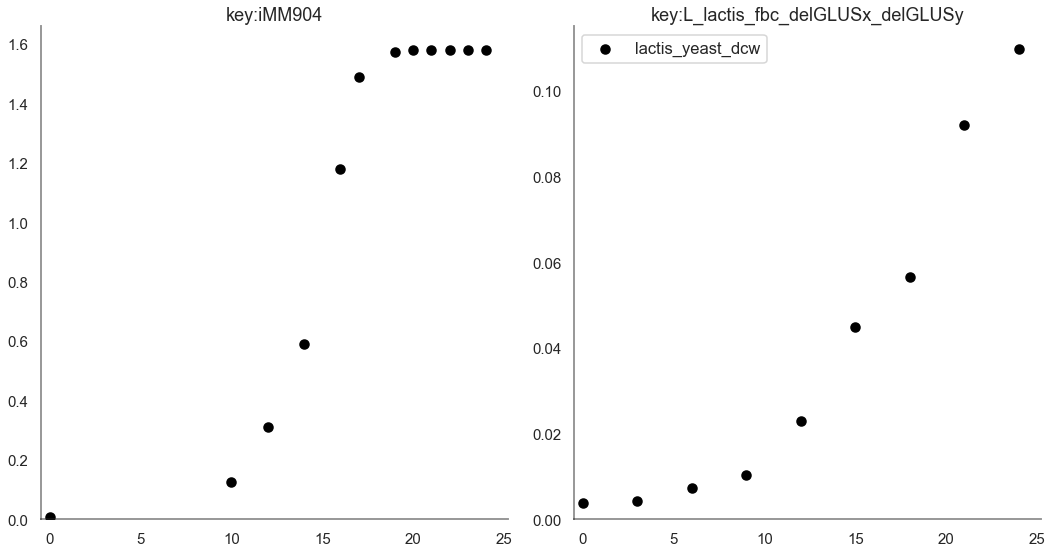

In [20]:
exp_sol_keys = [
    ["yeast_dcw", "iMM904"],
    ["lactis_yeast_dcw", "L_lactis_fbc_delGLUSx_delGLUSy"],
]

exp_data = pd.read_csv("./experimental_data/Figure1B_fake_data.csv")

plot_data(particle=filtered_particles[0], exp_data_df=exp_data, 
                       exp_t_key='time', exp_sol_keys=exp_sol_keys, subplots_shape=[1, 2])

['yeast_dcw', 'iMM904'] 1
0.5647914912757384
['lactis_yeast_dcw', 'L_lactis_fbc_delGLUSx_delGLUSy'] 0
0.03424441939409358


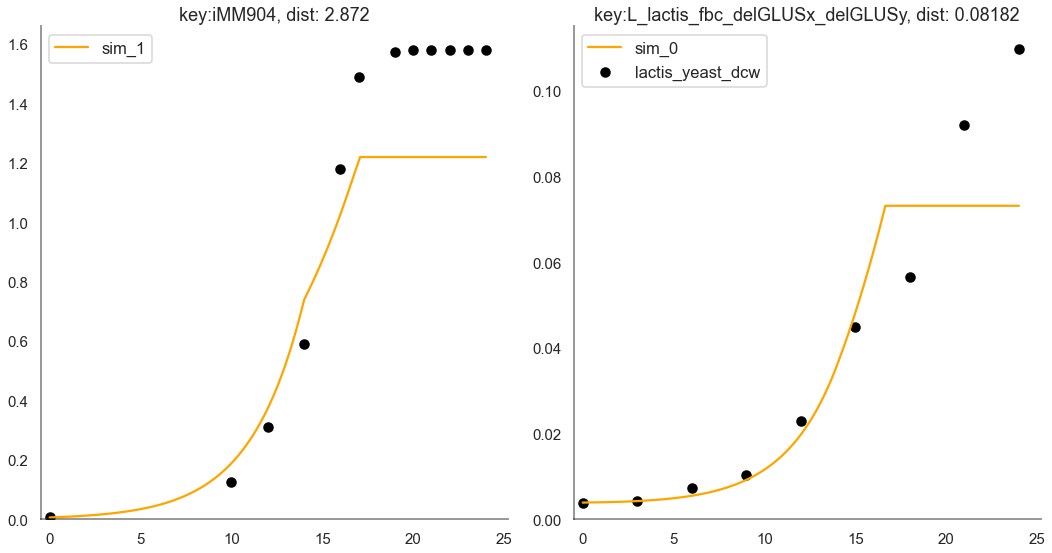

In [21]:
exp_sol_keys = [
    ["yeast_dcw", "iMM904"],
    ["lactis_yeast_dcw", "L_lactis_fbc_delGLUSx_delGLUSy"],
]

# exp_sol_keys = [
#     ["yeast_dcw", "iMM904"],
# #     ["lactis_yeast_dcw", "L_lactis_fbc"],
# ]

exp_data = pd.read_csv("./experimental_data/Figure1B_fake_data.csv")

plot_particle_and_data(particle=filtered_particles[0], exp_data_df=exp_data, 
                       exp_t_key='time', exp_sol_keys=exp_sol_keys, subplots_shape=[1, 2])

[<AxesSubplot:title={'center':'key:L_lactis_fbc_delGLUSx_delGLUSy, dist: 3.171'}>]

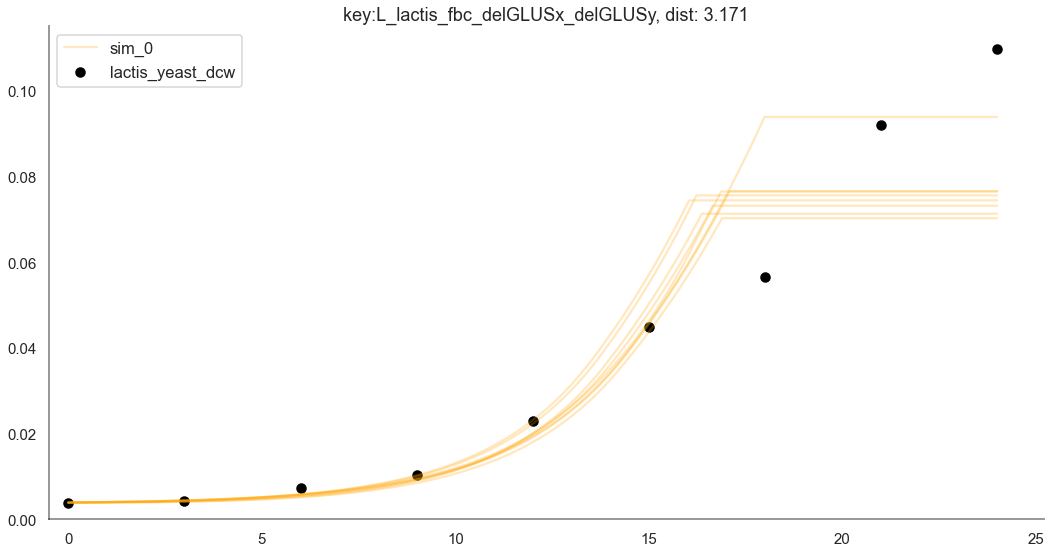

In [22]:
exp_sol_keys = [
    # ["yeast_dcw", "iMM904"],
    ["lactis_yeast_dcw", "L_lactis_fbc_delGLUSx_delGLUSy"],
]

plot_all_particles(particles=filtered_particles[0:100], exp_data_df=exp_data, exp_t_key='time', 
                   exp_sol_keys=exp_sol_keys, subplots_shape=[1, 1], plot_experimental_data=True)

[<AxesSubplot:title={'center':'key:iMM904, dist: 3.171'}>]

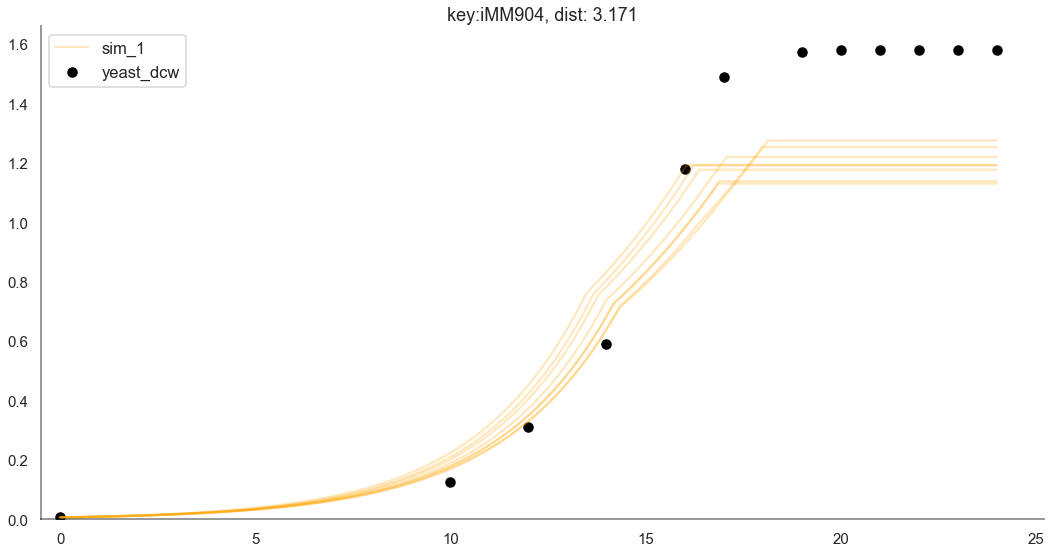

In [24]:
exp_sol_keys = [
    ["yeast_dcw", "iMM904"],
    # ["lactis_yeast_dcw", "L_lactis_fbc_delGLUSx_delGLUSy"],
]

plot_all_particles(particles=filtered_particles[0:100], exp_data_df=exp_data, exp_t_key='time', 
                   exp_sol_keys=exp_sol_keys, subplots_shape=[1, 1], plot_experimental_data=True)

In [10]:
df = generate_particle_parameter_df(filtered_particles)

In [11]:
# Drop constant columns
sub_df = df.copy(deep=True)
for col in df.columns:
    if len(df[col].unique()) == 1:
        sub_df.drop(col, inplace=True, axis=1)



In [12]:
k_val_columns = [x for x in sub_df.columns if 'K_' in x]
lb_constr_columns = [x for x in sub_df.columns if 'lb_constr_' in x]

In [13]:
k_sub_df = sub_df[k_val_columns]
lb_constr_sub_df = sub_df[lb_constr_columns]

In [14]:
def plot_boxplot(data):
    sns.set_context("talk")
    sns.set_style("white")

    width_inches = 95*4 / 25.4
    height_inches = 51*4 / 25.4

    fig, ax = plt.subplots(figsize=(width_inches, height_inches))
    sns.boxplot(data=data, color='#8093F1')

    ax.set(xlim=(-0.5,None))
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_alpha(0.5)
    ax.spines["bottom"].set_alpha(0.5)
    ax.tick_params(labelsize=9)
    # ax.set_yscale('symlog')
    # ax.set(xticklabels=[])
    # ax.margins(x=0)
    # ax.margins(y=0)
    plt.xticks(rotation=90)

    fig.tight_layout()


def plot_sampling_distributions():
    import sampling

    dist_1 = sampling.SampleUniform(
        min_val=-2, max_val=-0.001, distribution_type="log_uniform"
    )
    dist_2 = sampling.SampleUniform(
        min_val=1e-5, max_val=0.1, distribution_type="log_uniform"
    )

    max_uptake_sampler = multi_dist = sampling.MultiDistribution(
        dist_1, dist_2, prob_dist_1=0.0
    )
    k_val_sampler = sampling.SampleUniform(
        min_val=1e-5, max_val=2.0, distribution_type="log_uniform"
    )

    lb_sample = max_uptake_sampler.sample(size=[10000,1])
    k_sample = k_val_sampler.sample(size=[10000,1])

    width_inches = 95*4 / 25.4
    height_inches = 51*4 / 25.4


    fig, ax = plt.subplots(ncols=2, figsize=(width_inches, height_inches))
    ax[0].set_title('lower bound constraint distribution')
    ax[1].set_title('k value constraint distribution')
    bins_1 = np.logspace(np.log10(0.001),np.log10(2.0), 25)[::-1] * -1

    _ = ax[0].hist(lb_sample, bins=bins_1)

    bins=np.logspace(np.log10(1e-5),np.log10(2.0), 25)

    _ = ax[1].hist(k_sample, bins=bins)
    ax[1].set_xscale('log')
    ax[0].set_xscale('symlog', linthreshx=0.0000001)

def plot_sampling_distributions_2():
    import sampling

    dist_1 = sampling.SampleUniform(
        min_val=-2, max_val=-0.001, distribution_type="log_uniform"
    )
    dist_2 = sampling.SampleUniform(
        min_val=1e-5, max_val=0.1, distribution_type="log_uniform"
    )

    sample_1 = dist_1.sample(size=[10000, 1])
    sample_2 = dist_2.sample(size=[10000, 1])

    width_inches = 95*4 / 25.4
    height_inches = 51*4 / 25.4


    fig, ax = plt.subplots(ncols=2, figsize=(width_inches, height_inches))

    bins_1 = np.logspace(np.log10(0.001),np.log10(2.0), 25)[::-1] * -1
    _ = ax[0].hist(sample_1, bins=bins_1)
    ax[0].set_xscale('symlog', linthreshx=0.0000001)

    bins_2 = np.logspace(np.log10(1e-5),np.log10(0.1), 25)
    _ = ax[1].hist(sample_2, bins=bins_2)
    ax[1].set_xscale('log')


/var/folders/59/mfl58qxj151bv31dsnfrs1lh0000gn/T/ipykernel_5997/2469808169.py:84: MatplotlibDeprecationWarning: The 'linthreshx' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax[0].set_xscale('symlog', linthreshx=0.0000001)


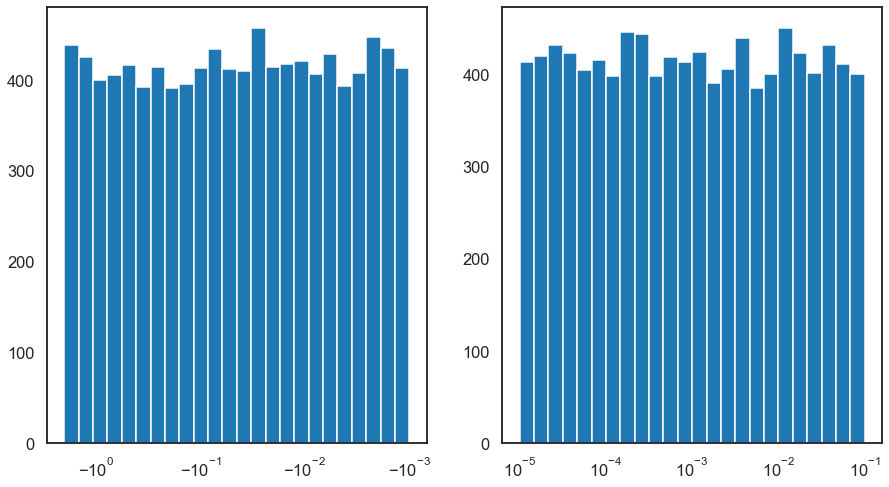

In [15]:
plot_sampling_distributions_2()

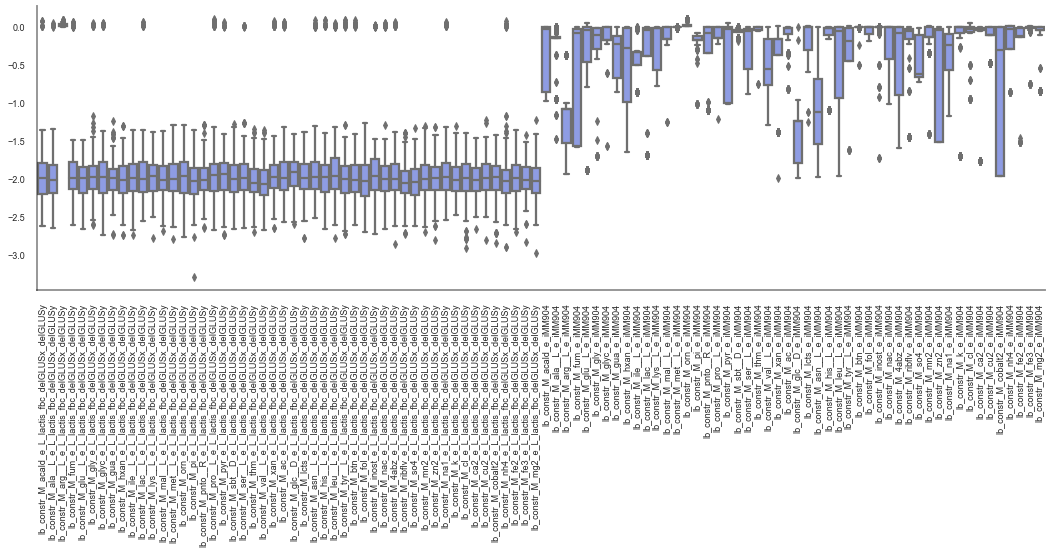

In [16]:
plot_boxplot(lb_constr_sub_df)

In [17]:
for x in df.columns:
    print(x)

init_L_lactis_fbc_delGLUSx_delGLUSy
init_iMM904
init_M_acald_e
init_M_ala__L_e
init_M_arg__L_e
init_M_fum_e
init_M_glu__L_e
init_M_gly_e
init_M_glyc_e
init_M_gua_e
init_M_hxan_e
init_M_ile__L_e
init_M_lac__L_e
init_M_lys__L_e
init_M_mal__L_e
init_M_met__L_e
init_M_orn_e
init_M_pi_e
init_M_pnto__R_e
init_M_pro__L_e
init_M_pyr_e
init_M_sbt__D_e
init_M_ser__L_e
init_M_thm_e
init_M_val__L_e
init_M_xan_e
init_M_ac_e
init_M_glc__D_e
init_M_lcts_e
init_M_asn__L_e
init_M_his__L_e
init_M_leu__L_e
init_M_tyr__L_e
init_M_btn_e
init_M_fol_e
init_M_inost_e
init_M_nac_e
init_M_4abz_e
init_M_ribflv_e
init_M_so4_e
init_M_mn2_e
init_M_zn2_e
init_M_na1_e
init_M_k_e
init_M_cl_e
init_M_ca2_e
init_M_cu2_e
init_M_cobalt2_e
init_M_nh4_e
init_M_fe2_e
init_M_fe3_e
init_M_mg2_e
K_M_acald_e_L_lactis_fbc_delGLUSx_delGLUSy
K_M_ala__L_e_L_lactis_fbc_delGLUSx_delGLUSy
K_M_arg__L_e_L_lactis_fbc_delGLUSx_delGLUSy
K_M_fum_e_L_lactis_fbc_delGLUSx_delGLUSy
K_M_glu__L_e_L_lactis_fbc_delGLUSx_delGLUSy
K_M_gly_e_L_lactis_fb

In [91]:
# df = df.loc[df['lb_constr_M_glu__L_e_iMM904'] > 0.0]

In [92]:
df

,init_L_lactis_fbc_delGLUSx_delGLUSy,init_iMM904,init_M_acald_e,init_M_ala__L_e,init_M_arg__L_e,init_M_fum_e,init_M_glu__L_e,init_M_gly_e,init_M_glyc_e,init_M_gua_e,...,lb_constr_M_na1_e_iMM904,lb_constr_M_k_e_iMM904,lb_constr_M_cl_e_iMM904,lb_constr_M_ca2_e_iMM904,lb_constr_M_cu2_e_iMM904,lb_constr_M_cobalt2_e_iMM904,lb_constr_M_nh4_e_iMM904,lb_constr_M_fe2_e_iMM904,lb_constr_M_fe3_e_iMM904,lb_constr_M_mg2_e_iMM904
0,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.570349,-1.694458,-0.026134,-0.049604,-0.111050,-1.960949,-0.297620,-0.015253,-0.001876,-0.050115
1,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.177819,-0.001967,-0.079676,-1.770293,-0.476124,-0.005738,-0.018563,-0.004104,-0.026219,-0.839345
2,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.095575,-0.005336,-0.001041,-0.012960,0.000210,-0.006515,-0.033589,-0.136584,-0.009832,-0.001376
3,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.095575,-0.005336,-0.001041,-0.012960,0.000210,-0.006515,-0.033589,-0.136584,-0.009832,-0.001376
4,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.570349,-1.694458,-0.026134,-0.049604,-0.111050,-1.960949,-0.297620,-0.015253,-0.001876,-0.050115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.012919,-0.001967,-0.948016,-0.001222,-0.476124,-0.313627,-0.859556,-1.519107,-0.751460,-0.006640
279,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.177819,-0.001967,-0.079676,-1.770293,-0.476124,-0.005738,-0.018563,-0.004104,-0.026219,-0.839345
280,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.177819,-0.001967,-0.079676,-1.770293,-0.476124,-0.005738,-0.018563,-0.004104,-0.026219,-0.839345
281,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.177819,-0.001967,-0.079676,-1.770293,-0.476124,-0.005738,-0.018563,-0.004104,-0.026219,-0.839345


In [93]:
def plot_tsne(df):
    from sklearn import manifold
    tsne = manifold.TSNE(n_components=2, n_jobs=5).fit_transform(df)
    width_inches = 95*4 / 25.4
    height_inches = 51*4 / 25.4

    fig, ax = plt.subplots(figsize=(width_inches, height_inches))
    ax.scatter(x=tsne[:, 0], y=tsne[:, 1], s=3)

    # ax.set(xlim=(-0.5,None))
    # ax.set(ylim=(-0))
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_alpha(0.5)
    ax.spines["bottom"].set_alpha(0.5)
    ax.tick_params(labelsize=15)
    ax.margins(x=0)
    ax.margins(y=0)
    fig.tight_layout()



In [94]:
df

,init_L_lactis_fbc_delGLUSx_delGLUSy,init_iMM904,init_M_acald_e,init_M_ala__L_e,init_M_arg__L_e,init_M_fum_e,init_M_glu__L_e,init_M_gly_e,init_M_glyc_e,init_M_gua_e,...,lb_constr_M_na1_e_iMM904,lb_constr_M_k_e_iMM904,lb_constr_M_cl_e_iMM904,lb_constr_M_ca2_e_iMM904,lb_constr_M_cu2_e_iMM904,lb_constr_M_cobalt2_e_iMM904,lb_constr_M_nh4_e_iMM904,lb_constr_M_fe2_e_iMM904,lb_constr_M_fe3_e_iMM904,lb_constr_M_mg2_e_iMM904
0,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.570349,-1.694458,-0.026134,-0.049604,-0.111050,-1.960949,-0.297620,-0.015253,-0.001876,-0.050115
1,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.177819,-0.001967,-0.079676,-1.770293,-0.476124,-0.005738,-0.018563,-0.004104,-0.026219,-0.839345
2,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.095575,-0.005336,-0.001041,-0.012960,0.000210,-0.006515,-0.033589,-0.136584,-0.009832,-0.001376
3,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.095575,-0.005336,-0.001041,-0.012960,0.000210,-0.006515,-0.033589,-0.136584,-0.009832,-0.001376
4,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.570349,-1.694458,-0.026134,-0.049604,-0.111050,-1.960949,-0.297620,-0.015253,-0.001876,-0.050115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.012919,-0.001967,-0.948016,-0.001222,-0.476124,-0.313627,-0.859556,-1.519107,-0.751460,-0.006640
279,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.177819,-0.001967,-0.079676,-1.770293,-0.476124,-0.005738,-0.018563,-0.004104,-0.026219,-0.839345
280,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.177819,-0.001967,-0.079676,-1.770293,-0.476124,-0.005738,-0.018563,-0.004104,-0.026219,-0.839345
281,0.0039,0.0062,0.00001,0.00001,4.13318,0.00001,0.00001,0.00001,0.00001,0.00001,...,-0.177819,-0.001967,-0.079676,-1.770293,-0.476124,-0.005738,-0.018563,-0.004104,-0.026219,-0.839345


In [95]:
def plot_correlation_heatmap(df):
    # Colors

    width_inches = 95*4 / 25.4
    height_inches = 51*4 / 25.4

    fig, ax = plt.subplots(figsize=(width_inches, height_inches))
    cmap = sns.diverging_palette(500, 10, as_cmap=True).reversed()
    ax.tick_params(labelsize=8)
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=False, cmap=cmap, ax=ax)
    


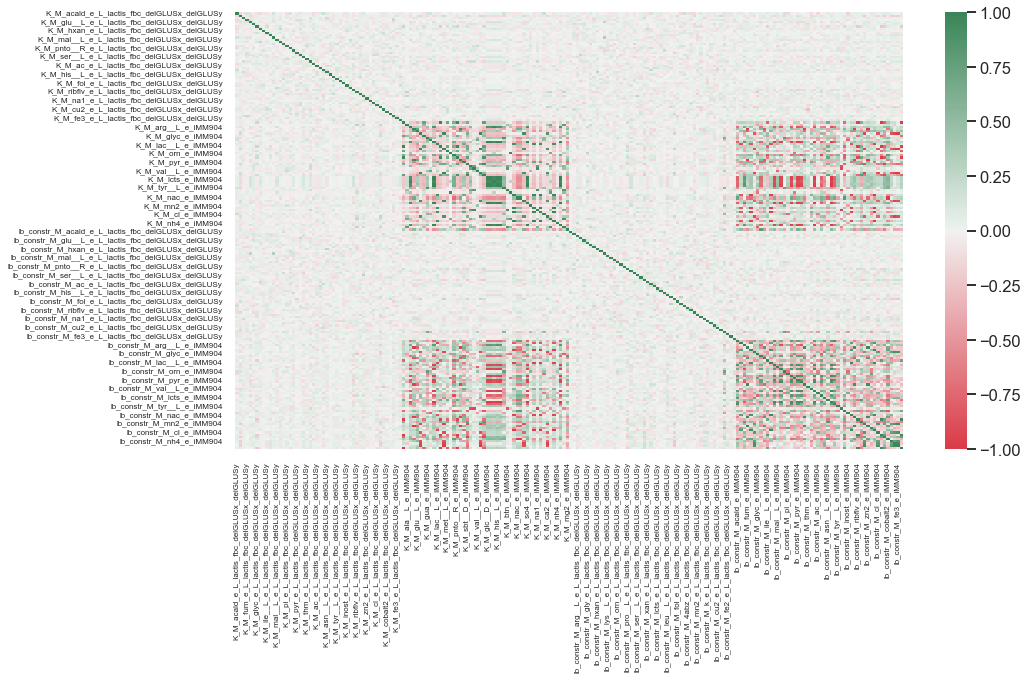

In [97]:
plot_correlation_heatmap(sub_df)

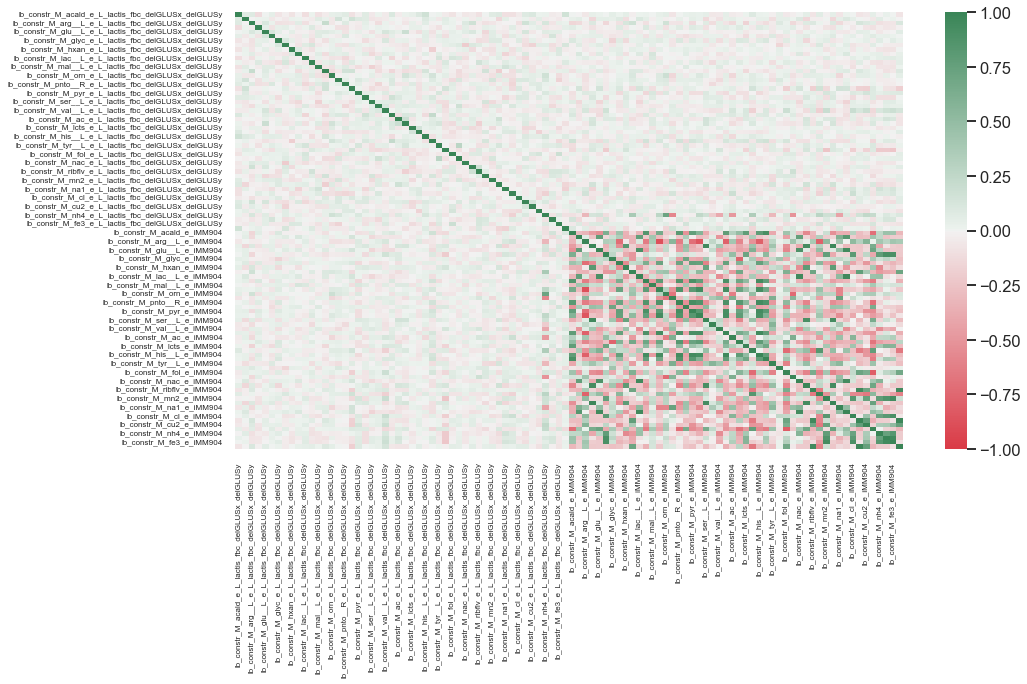

In [98]:
plot_correlation_heatmap(lb_constr_sub_df)

/Users/bezk/opt/miniconda3/envs/cobrapy_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/bezk/opt/miniconda3/envs/cobrapy_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


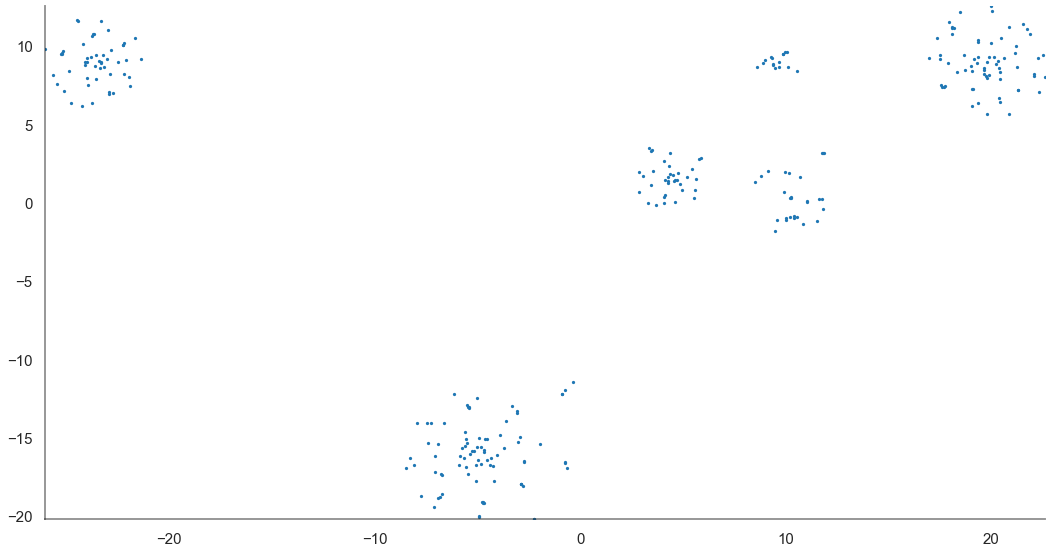

In [99]:
plot_tsne(lb_constr_sub_df)

/Users/bezk/opt/miniconda3/envs/cobrapy_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/bezk/opt/miniconda3/envs/cobrapy_env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


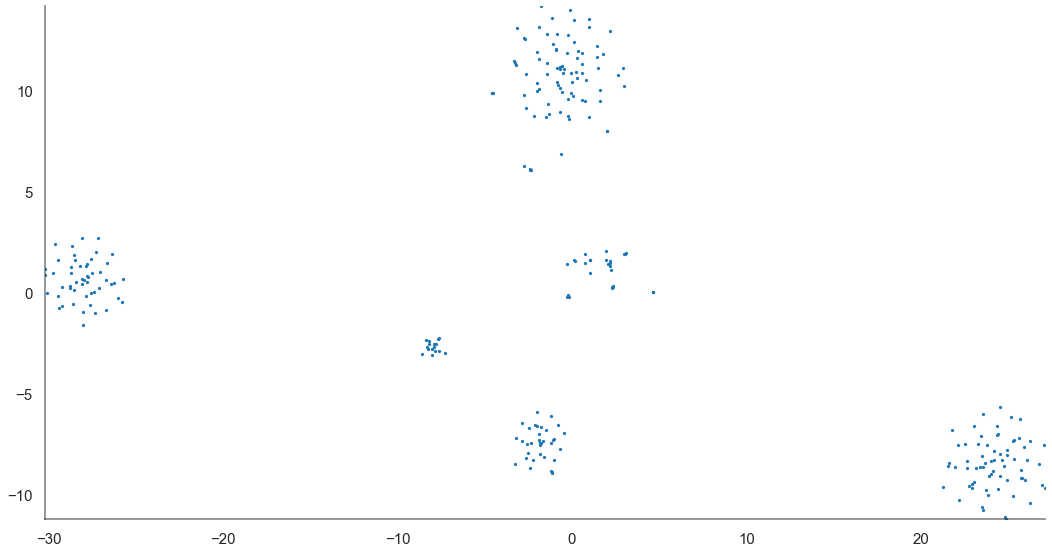

In [100]:
plot_tsne(sub_df)

In [101]:
print("Population can have positive lb constraint (exporter): ")
for col in lb_constr_columns:
    if lb_constr_sub_df[col].max() > 0:
        print(sum(lb_constr_sub_df[col] > 0), f"\t{col}")
        print(sum(lb_constr_sub_df[col] < 0), f"\t{col}")

Population can have positive lb constraint (exporter): 
11 	lb_constr_M_acald_e_L_lactis_fbc_delGLUSx_delGLUSy
272 	lb_constr_M_acald_e_L_lactis_fbc_delGLUSx_delGLUSy
11 	lb_constr_M_ala__L_e_L_lactis_fbc_delGLUSx_delGLUSy
272 	lb_constr_M_ala__L_e_L_lactis_fbc_delGLUSx_delGLUSy
283 	lb_constr_M_arg__L_e_L_lactis_fbc_delGLUSx_delGLUSy
0 	lb_constr_M_arg__L_e_L_lactis_fbc_delGLUSx_delGLUSy
16 	lb_constr_M_fum_e_L_lactis_fbc_delGLUSx_delGLUSy
267 	lb_constr_M_fum_e_L_lactis_fbc_delGLUSx_delGLUSy
10 	lb_constr_M_gly_e_L_lactis_fbc_delGLUSx_delGLUSy
273 	lb_constr_M_gly_e_L_lactis_fbc_delGLUSx_delGLUSy
13 	lb_constr_M_glyc_e_L_lactis_fbc_delGLUSx_delGLUSy
270 	lb_constr_M_glyc_e_L_lactis_fbc_delGLUSx_delGLUSy
8 	lb_constr_M_lac__L_e_L_lactis_fbc_delGLUSx_delGLUSy
275 	lb_constr_M_lac__L_e_L_lactis_fbc_delGLUSx_delGLUSy
18 	lb_constr_M_pro__L_e_L_lactis_fbc_delGLUSx_delGLUSy
265 	lb_constr_M_pro__L_e_L_lactis_fbc_delGLUSx_delGLUSy
15 	lb_constr_M_pyr_e_L_lactis_fbc_delGLUSx_delGLUSy
268 	lb

In [43]:
print("Population has only neagtive lb constraint (importer): ")
for col in lb_constr_columns:
    if lb_constr_sub_df[col].max() < 0:
        print(f"\t{col}")

Population has only neagtive lb constraint (importer): 
	lb_constr_M_fum_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_glu__L_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_gua_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_hxan_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_ile__L_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_lys__L_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_mal__L_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_met__L_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_orn_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_pi_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_pnto__R_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_sbt__D_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_ser__L_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_thm_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_val__L_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_xan_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_glc__D_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M_lcts_e_L_lactis_fbc_delGLUSx_delGLUSy
	lb_constr_M

In [102]:
lb_constr_sub_df

,lb_constr_M_acald_e_L_lactis_fbc_delGLUSx_delGLUSy,lb_constr_M_ala__L_e_L_lactis_fbc_delGLUSx_delGLUSy,lb_constr_M_arg__L_e_L_lactis_fbc_delGLUSx_delGLUSy,lb_constr_M_fum_e_L_lactis_fbc_delGLUSx_delGLUSy,lb_constr_M_glu__L_e_L_lactis_fbc_delGLUSx_delGLUSy,lb_constr_M_gly_e_L_lactis_fbc_delGLUSx_delGLUSy,lb_constr_M_glyc_e_L_lactis_fbc_delGLUSx_delGLUSy,lb_constr_M_gua_e_L_lactis_fbc_delGLUSx_delGLUSy,lb_constr_M_hxan_e_L_lactis_fbc_delGLUSx_delGLUSy,lb_constr_M_ile__L_e_L_lactis_fbc_delGLUSx_delGLUSy,...,lb_constr_M_na1_e_iMM904,lb_constr_M_k_e_iMM904,lb_constr_M_cl_e_iMM904,lb_constr_M_ca2_e_iMM904,lb_constr_M_cu2_e_iMM904,lb_constr_M_cobalt2_e_iMM904,lb_constr_M_nh4_e_iMM904,lb_constr_M_fe2_e_iMM904,lb_constr_M_fe3_e_iMM904,lb_constr_M_mg2_e_iMM904
0,-1.999683,-2.643368,0.043440,-2.133012,-2.040433,-1.949430,-1.941201,-1.773702,-1.992879,-2.241472,...,-0.570349,-1.694458,-0.026134,-0.049604,-0.111050,-1.960949,-0.297620,-0.015253,-0.001876,-0.050115
1,-2.094574,-1.732028,0.003153,-1.580495,-1.911624,0.051052,-2.110578,-2.063030,-1.840355,-2.195293,...,-0.177819,-0.001967,-0.079676,-1.770293,-0.476124,-0.005738,-0.018563,-0.004104,-0.026219,-0.839345
2,-1.979787,-2.200163,0.020158,-2.059783,-1.690542,0.006958,-1.926597,-1.935739,-2.109481,-1.793926,...,-0.095575,-0.005336,-0.001041,-0.012960,0.000210,-0.006515,-0.033589,-0.136584,-0.009832,-0.001376
3,-2.018048,-2.248404,0.010133,-2.361994,-1.590360,0.005572,-2.028692,-2.017128,-2.024695,-2.116905,...,-0.095575,-0.005336,-0.001041,-0.012960,0.000210,-0.006515,-0.033589,-0.136584,-0.009832,-0.001376
4,-2.129768,-1.884977,0.071695,-1.575823,-1.875517,-2.059912,-1.798285,-2.290153,-1.745247,-2.195293,...,-0.570349,-1.694458,-0.026134,-0.049604,-0.111050,-1.960949,-0.297620,-0.015253,-0.001876,-0.050115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,-1.805803,-1.646353,0.008001,-2.166636,-1.826057,-1.867858,-2.163355,-1.983938,-2.194278,-2.345488,...,-0.012919,-0.001967,-0.948016,-0.001222,-0.476124,-0.313627,-0.859556,-1.519107,-0.751460,-0.006640
279,-2.333803,-2.142553,0.041897,-2.029837,-1.990057,-1.450224,-2.443542,-2.278731,-2.448602,-1.356168,...,-0.177819,-0.001967,-0.079676,-1.770293,-0.476124,-0.005738,-0.018563,-0.004104,-0.026219,-0.839345
280,-1.752276,-2.131892,0.005746,-1.535194,-2.517635,-2.064333,-2.268764,-2.069488,-2.143306,-1.739952,...,-0.177819,-0.001967,-0.079676,-1.770293,-0.476124,-0.005738,-0.018563,-0.004104,-0.026219,-0.839345
281,-1.506611,-2.472704,0.005746,-2.564994,-1.839433,-1.792068,-2.046118,-1.785048,-2.016856,-2.076313,...,-0.177819,-0.001967,-0.079676,-1.770293,-0.476124,-0.005738,-0.018563,-0.004104,-0.026219,-0.839345
